In [1]:
import numpy as np
import pandas as pd                                               
import sklearn
import xgboost
from xgboost import cv
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
#from mlxtend.classifier import StackingClassifier
from sklearn.ensemble import StackingRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn import svm
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.inspection import permutation_importance
from xgboost import XGBRegressor
import sklearn.gaussian_process as gp
import import_ipynb
import method_1_reg
import method_2_reg

importing Jupyter notebook from method_1_reg.ipynb


<string>:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
<string>:3: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
<string>:4: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
<string>:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
<string>:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
<string>:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only


importing Jupyter notebook from method_2_reg.ipynb


<string>:3: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
<string>:4: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only


In [6]:
train = pd.read_csv('train_method1_rg.csv')
test = pd.read_csv('test_method1_rg.csv')
rs = method_1_reg.rs
# rs = method_2_reg.rs                                    ### uncooment this if running the method_2 and using the random state of that method

In [7]:
Y_train = train['y']
X_train = train.drop(columns = ['y'])

In [8]:
Y_test = test['y']
X_test = test.drop(columns = ['y'])

[2.00833835 4.43480425 3.47251208 4.10144789 2.65006424 1.71659124
 2.34894489 3.10200262 2.65767942 2.22817168 2.01889788 2.77581941
 2.78988205 2.86824819 3.29086015 2.19467767 3.18176373 2.57566737
 2.18801458 3.3531775  1.91980679 3.38465355 2.00667217 5.11028481
 2.32009013 3.25145131 2.58539387 3.52789968]
Mean squared error: 0.22457049016946046 Root Mean squared error: 0.47388868964078523
Validation accuracy is 0.7394991161402362
Training accuracy is 0.8682391926842955
Testing accuracy is 0.7765942273411557


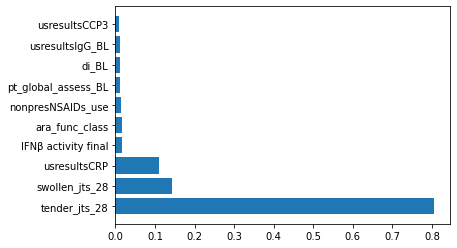

In [10]:
ridge_reg = None
def ridge_reg(X_train, X_test, Y_train,Y_test):
    global ridge_reg
    ridge_reg = sklearn.linear_model.Ridge(random_state = rs)
    ridge_reg.fit(X_train, Y_train)
    results = cross_val_score(ridge_reg, X_train, Y_train, cv=10, scoring="r2")
    preds = ridge_reg.predict(X_test)
    print(preds)
    
    print("Mean squared error:", mean_squared_error(Y_test,preds),"Root Mean squared error:", np.sqrt(mean_squared_error(Y_test,preds)))
    print("Validation accuracy is", results.mean())
    print(f"Training accuracy is {ridge_reg.score(X_train, Y_train)}")
    print(f"Testing accuracy is {ridge_reg.score(X_test, Y_test)}")
    X_test_1['preds'] = preds
    result = permutation_importance(ridge_reg, X_train, Y_train, n_repeats=10, random_state=0, n_jobs=2)
    sorted_index = result.importances_mean.argsort()
    top10 = sorted_index[-10:]
    feature_names = list(X_train.columns)
    top10 = top10[::-1]
    arr_x = []
    arr_y = []
    for i in top10:
        arr_x.append( result.importances_mean[i])
        arr_y.append(feature_names[i])
    plt.barh(arr_y, arr_x)
    plt.show()
ridge_reg(X_train, X_test, Y_train, Y_test)

C:\Users\valay\anaconda3\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


Mean squared error: 0.16251598168281642 Root Mean squared error: 0.40313270976542753
Validation accuracy is 0.8463497017193475
Training accuracy is 0.9318258498561114
Testing accuracy is 0.8271072055221268


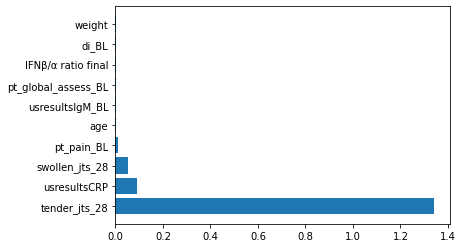

In [8]:
rf_model = None
def random_forest(X_train, X_test, Y_train,Y_test):
    global rf_model
    rf_model = sklearn.ensemble.RandomForestRegressor(n_estimators=474, oob_score = True, criterion='squared_error',max_depth=90, min_samples_split=10, random_state=rs, max_features='auto', min_samples_leaf = 6)
    rf_model.fit(X_train, Y_train)
    preds = rf_model.predict(X_test)
    print("Mean squared error:", mean_squared_error(Y_test,preds),"Root Mean squared error:", np.sqrt(mean_squared_error(Y_test,preds)))
    print("Validation accuracy is", rf_model.oob_score_)
    print(f"Training accuracy is {rf_model.score(X_train, Y_train)}")
    print(f"Testing accuracy is {rf_model.score(X_test, Y_test)}")
    result = permutation_importance(rf_model, X_train, Y_train, n_repeats=10, random_state=0, n_jobs=2)
    sorted_index = result.importances_mean.argsort()
    top10 = sorted_index[-10:]
    feature_names = list(X_train.columns)
    top10 = top10[::-1]
    arr_x = []
    arr_y = []
    for i in top10:
        arr_x.append( result.importances_mean[i])
        arr_y.append(feature_names[i])
    plt.barh(arr_y, arr_x)
    plt.show()
random_forest(X_train, X_test, Y_train, Y_test)

Mean squared error: 0.10075756499329117 Root Mean squared error: 0.31742332143888097
Validation accuracy is 0.659266769161136
Training accuracy is 0.9420503695734179
Testing accuracy is 0.8928089607182432


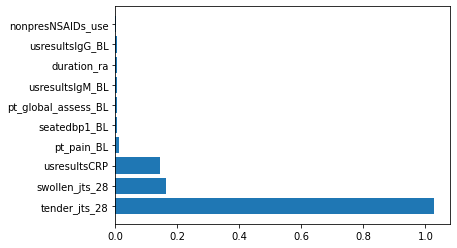

In [13]:
xgb_model = None
def xgboost(X_train, X_test,Y_train, Y_test):
    global xgb_model
    xgb_model = XGBRegressor(n_estimators = 200, random_state=rs, subsample=0.8, max_depth=50, eta=0.5, gamma=1, min_child_weight=10, alpha=1)
    xgb_model.fit(X_train, Y_train)
    results = cross_val_score(xgb_model, X_train, Y_train, cv=10)
    preds = xgb_model.predict(X_test)
    print("Mean squared error:", mean_squared_error(Y_test,preds),"Root Mean squared error:", np.sqrt(mean_squared_error(Y_test,preds)))
    print("Validation accuracy is", results.mean())
    print(f"Training accuracy is {xgb_model.score(X_train, Y_train)}")
    print(f"Testing accuracy is {xgb_model.score(X_test, Y_test)}")
    result = permutation_importance(xgb_model, X_train, Y_train, n_repeats=10, random_state=0, n_jobs=2)
    sorted_index = result.importances_mean.argsort()
    top10 = sorted_index[-10:]
    feature_names = list(X_train.columns)
    top10 = top10[::-1]
    arr_x = []
    arr_y = []
    for i in top10:
        arr_x.append( result.importances_mean[i])
        arr_y.append(feature_names[i])
    plt.barh(arr_y, arr_x)
    plt.show()
    plt.show()
xgboost(X_train, X_test, Y_train, Y_test)

C:\Users\valay\anaconda3\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
C:\Users\valay\anaconda3\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
C:\Users\valay\anaconda3\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
C:\Users\valay\anaconda3\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
C:\Users\valay\anaconda3\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
C:\Users\valay\anaconda3\lib\site-packages\sklearn\base.py:441: U

C:\Users\valay\anaconda3\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
C:\Users\valay\anaconda3\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
C:\Users\valay\anaconda3\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
C:\Users\valay\anaconda3\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
C:\Users\valay\anaconda3\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
C:\Users\valay\anaconda3\lib\site-packages\sklearn\base.py:441: U

Mean squared error: 0.1528155324700292 Root Mean squared error: 0.3909162729665129
Validation accuracy is: 0.8838238598463114
Training accuracy is 0.9548639398148867
Testing accuracy is 0.8479770334918996


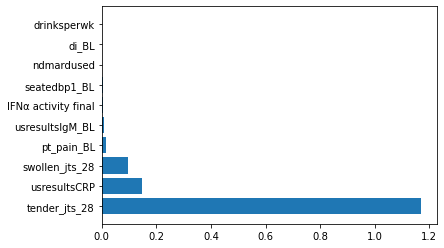

In [12]:
st_reg = None
def stacking_regressor(X_train, X_test,Y_train, Y_test):
    global st_reg
    rr = sklearn.linear_model.Ridge(random_state = rs)
    SVR = svm.SVR(kernel = 'rbf')
    xgb = XGBRegressor(n_estimators = 200, subsample=0.8, max_depth=50, eta=0.5, gamma=1, min_child_weight=10, alpha=1, random_state=rs)   
    rf = sklearn.ensemble.RandomForestRegressor(n_estimators=474, oob_score = True, criterion='squared_error',max_depth=90, min_samples_split=10, max_features='auto', min_samples_leaf = 6, random_state = rs)
    NB = gp.GaussianProcessRegressor(n_restarts_optimizer=10, alpha=0.1, normalize_y=True)
    knn = KNeighborsRegressor(n_neighbors=10)
    st_reg = StackingRegressor(estimators =[('xgb',xgb),('rf',rf),('nb',NB),('SVM',SVR)], final_estimator = rr)
    st_reg = st_reg.fit(X_train, Y_train)
    kfold = StratifiedKFold(n_splits=10)
    results = cross_val_score(st_reg, X_train, Y_train, cv=10)
    preds = st_reg.predict(X_test)
    print("Mean squared error:", mean_squared_error(Y_test,preds),"Root Mean squared error:", np.sqrt(mean_squared_error(Y_test,preds)))
    print("Validation accuracy is:", results.mean())
    print(f"Training accuracy is {st_reg.score(X_train, Y_train)}")
    print(f"Testing accuracy is {st_reg.score(X_test, Y_test)}")
    result = permutation_importance(st_reg, X_train, Y_train, n_repeats=10, random_state=0, n_jobs=2)
    sorted_index = result.importances_mean.argsort()
    top10 = sorted_index[-10:]
    feature_names = list(X_train.columns)
    top10 = top10[::-1]
    arr_x = []
    arr_y = []
    for i in top10:
        arr_x.append( result.importances_mean[i])
        arr_y.append(feature_names[i])
    plt.barh(arr_y, arr_x)
    plt.show()
    
stacking_regressor(X_train, X_test, Y_train, Y_test)

In [ ]:
### uncomment this code in order to plot the heat map for overlapping of all the features in the regression model
'''

import seaborn as sns
arr_y_rr = ['tender_jts_28','swollen_jts_28','usresultsCRP','IFNb_activity_final','ara_func_class','nonpresNSAIDs_use','pt_global_assess_bl','di_bl','usresultsIgG_bl','usresultsCCP3']
arr_y_sr = ['tender_jts_28','usresultsCRP','swollen_jts_28','pt_pain_bl','usresultsIgM_bl','IFNa_activity_final','seatedbp1_bl','ndmardused','di_bl','drinksperwk']
arr_y_rf = ['tender_jts_28','usresultsCRP', 'swollen_jts_28','pt_pain_bl','pt_global_assess_bl','usresultsIgM_bl','di_bl','usresultsCRP_bl','usresultsCCP3','usresultsIgA_bl']
arr_y_xgb = ['tender_jts_28','usresultsCRP', 'swollen_jts_28','pt_pain_bl','usresultsIgM_bl','di_bl','drinksperwk','height','newsmoker','drinker']
arr_val = ['tender_jts_28','swollen_jts_28','usresultsCRP','IFNb_activity_final','ara_func_class','nonpresNSAIDs_use','pt_global_assess_bl','di_bl','usresultsIgG_bl','usresultsCCP3','pt_pain_bl','usresultsIgM_bl','IFNa_activity_final','seatedbp1_bl','ndmardused','drinksperwk','usresultsCRP_bl','usresultsIgA_bl','height','newsmoker','drinker']
results_df = pd.DataFrame(arr_val,columns=['feature_name'])
results_df['rr'] = [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0]
results_df['sr'] = [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0]
results_df['rf'] = [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0]
results_df['xgb'] = [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0]
for i in range(len(results_df['feature_name'])):
    if results_df['feature_name'][i] in arr_y:
        index = arr_y.index(results_df['feature_name'][i])  #  np.where(arr_y == results_df['feature_name'][i])
        results_df['rr'][i] = index + 1
    else:
         results_df['rr'][i] = 0
    if results_df['feature_name'][i] in arr_y_sr:
        index = arr_y_sr.index(results_df['feature_name'][i])
        results_df['sr'][i] = index + 1
    else:
         results_df['sr'][i] = 0
    if results_df['feature_name'][i] in arr_y_rf:
        index = arr_y_rf.index(results_df['feature_name'][i])
        results_df['rf'][i] = index + 1
    else:
         results_df['rf'][i] = 0
    if results_df['feature_name'][i] in arr_y_xgb:
        index = arr_y_xgb.index(results_df['feature_name'][i])
        results_df['xgb'][i] = index + 1
    else:
         results_df['xgb'][i] = 0
    
fig, ax = plt.subplots(figsize=(7, 5))
new_df = results_df.set_index('feature_name')
print(new_df)
heatmap1 = sns.heatmap(new_df, annot=True, ax=ax,vmin=0, vmax=10, annot_kws={'fontsize':8})
# ax.figure.figsize = (5,3)
ax.xaxis.tick_top()'''